# Model Comparisons
---

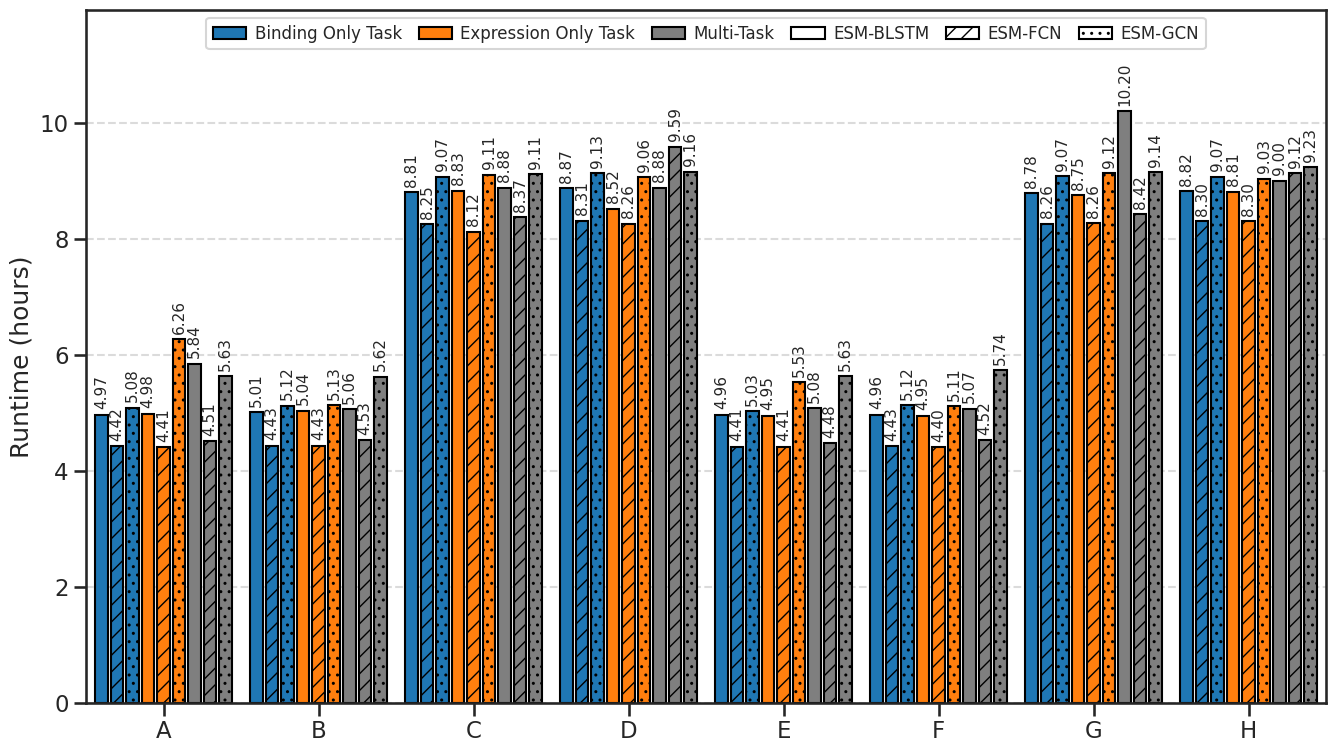

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from datetime import timedelta

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from datetime import datetime, timedelta

runtime_dict = {
    "ESM-BLSTM.A.single.binding": "4:57:59",
    "ESM-FCN.A.single.binding": "4:25:17",
    "ESM-GCN.A.single.binding": "5:04:59",
    "ESM-BLSTM.A.single.expression": "4:58:43",
    "ESM-FCN.A.single.expression": "4:24:32",
    "ESM-GCN.A.single.expression": "6:15:51",
    "ESM-BLSTM.A.multi": "5:50:31",
    "ESM-FCN.A.multi": "4:30:31",
    "ESM-GCN.A.multi": "5:37:36",

    "ESM-BLSTM.B.single.binding": "5:00:28",
    "ESM-FCN.B.single.binding": "4:25:45",
    "ESM-GCN.B.single.binding": "5:07:00",
    "ESM-BLSTM.B.single.expression": "5:02:12",
    "ESM-FCN.B.single.expression": "4:25:57",
    "ESM-GCN.B.single.expression": "5:07:41",
    "ESM-BLSTM.B.multi": "5:03:19",
    "ESM-FCN.B.multi": "4:31:36",
    "ESM-GCN.B.multi": "5:37:07",

    "ESM-BLSTM.C.single.binding": "8:48:20",
    "ESM-FCN.C.single.binding": "8:15:10",
    "ESM-GCN.C.single.binding": "9:04:07",
    "ESM-BLSTM.C.single.expression": "8:49:44",
    "ESM-FCN.C.single.expression": "8:07:27",
    "ESM-GCN.C.single.expression": "9:06:20",
    "ESM-BLSTM.C.multi": "8:52:56",    
    "ESM-FCN.C.multi": "8:22:08",
    "ESM-GCN.C.multi": "9:06:36",

    "ESM-BLSTM.D.single.binding": "8:52:22",
    "ESM-FCN.D.single.binding": "8:18:27",
    "ESM-GCN.D.single.binding": "9:07:35",
    "ESM-BLSTM.D.single.expression": "8:31:11",
    "ESM-FCN.D.single.expression": "8:15:27",
    "ESM-GCN.D.single.expression": "9:03:28",
    "ESM-BLSTM.D.multi": "8:52:45",
    "ESM-FCN.D.multi": "9:35:15",
    "ESM-GCN.D.multi": "9:09:29",

    "ESM-BLSTM.E.single.binding": "4:57:46",
    "ESM-FCN.E.single.binding": "4:24:41",
    "ESM-GCN.E.single.binding": "5:01:38",
    "ESM-BLSTM.E.single.expression": "4:57:03",
    "ESM-FCN.E.single.expression": "4:24:53",
    "ESM-GCN.E.single.expression": "5:31:30",
    "ESM-BLSTM.E.multi": "5:04:47",
    "ESM-FCN.E.multi": "4:28:38",
    "ESM-GCN.E.multi": "5:37:57",

    "ESM-BLSTM.F.single.binding": "4:57:44",
    "ESM-FCN.F.single.binding": "4:25:31",
    "ESM-GCN.F.single.binding": "5:07:26",
    "ESM-BLSTM.F.single.expression": "4:57:03",
    "ESM-FCN.F.single.expression": "4:24:14",
    "ESM-GCN.F.single.expression": "5:06:29",    
    "ESM-BLSTM.F.multi": "5:04:11",
    "ESM-FCN.F.multi": "4:31:19",
    "ESM-GCN.F.multi": "5:44:11",

    "ESM-BLSTM.G.single.binding": "8:46:57",
    "ESM-FCN.G.single.binding": "8:15:31",
    "ESM-GCN.G.single.binding": "9:04:27",
    "ESM-BLSTM.G.single.expression": "8:44:59",
    "ESM-FCN.G.single.expression": "8:15:51",
    "ESM-GCN.G.single.expression": "9:07:29",
    "ESM-BLSTM.G.multi": "10:12:00",
    "ESM-FCN.G.multi": "8:25:27",
    "ESM-GCN.G.multi": "9:08:35",

    "ESM-BLSTM.H.single.binding": "8:49:15",
    "ESM-FCN.H.single.binding": "8:18:06",
    "ESM-GCN.H.single.binding": "9:04:16",
    "ESM-BLSTM.H.single.expression": "8:48:25",
    "ESM-FCN.H.single.expression": "8:18:15",
    "ESM-GCN.H.single.expression": "9:02:01",
    "ESM-BLSTM.H.multi": "8:59:49",
    "ESM-FCN.H.multi": "9:07:29",
    "ESM-GCN.H.multi": "9:13:58"
}

def parse_extended_time(time_str):
    hours, minutes, seconds = map(int, time_str.split(':'))
    td = timedelta(hours=hours, minutes=minutes, seconds=seconds)
    return td.total_seconds() / 3600

runtime_hours = {k: parse_extended_time(v) for k, v in runtime_dict.items()}

def get_bar_color(label):
    if "binding" in label:
        return "tab:blue"
    elif "expression" in label:
        return "tab:orange"
    elif "multi" in label:
        return 'tab:grey'
    
def get_hatch(label):
    if label.startswith("ESM-FCN"):
        return "//"
    elif label.startswith("ESM-GCN"):
        return ".."
    else:
        return None

labels = list(runtime_hours.keys())
values = list(runtime_hours.values())
colors = [get_bar_color(label) for label in labels]
hatchs = [get_hatch(label) for label in labels]

# Custom spaced x positions
x_positions = []
gap = 1           # Extra space between groups
group_size = 9    # Bars per group

for i in range(len(labels)):
    group_index = i // group_size
    within_group_index = i % group_size
    position = group_index * (group_size + gap) + within_group_index
    x_positions.append(position)

# Plot setup 
sns.set_style("ticks")
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(16, 9))

bars = ax.bar(x_positions, values, color=colors, edgecolor='black', hatch=hatchs)

# Annotate values
for bar in bars:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.text(x, height + 0.1, f"{height:.2f}", ha="center", va="bottom", fontsize=11, rotation=90)

# Tick labels centered on 5th bar (index 4) in each 9-bar group 
xtick_labels = []
visible_ticks = []

for i in range(len(labels)):
    if i % group_size == 4:
        label = labels[i].split(".")[1]  # "A", "B", ...
        xtick_labels.append(label)
        visible_ticks.append(x_positions[i])
    else:
        xtick_labels.append("")

ax.set_xticks(x_positions)
ax.set_xticklabels(xtick_labels, rotation=0, ha="center")

# Hide tick marks not at group centers
for i, tick in enumerate(ax.get_xticklines()):
    # Each tick has 2 lines (bottom + top), so divide index by 2 to get position index
    tick_pos = i // 2
    if x_positions[tick_pos] not in visible_ticks:
        tick.set_visible(False)

ax.set_xlim(min(x_positions) - 1, max(x_positions) + 1)
ax.set_ylim(0, max(values) + 1.75)
ax.set_ylabel("Runtime (hours)")
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Legend
color_patches = [
    Patch(facecolor='tab:blue', edgecolor='black', label='Binding Only Task'),
    Patch(facecolor='tab:orange', edgecolor='black', label='Expression Only Task'),
    Patch(facecolor='tab:grey', edgecolor='black', label='Multi-Task')
]
hatch_patches = [
    Patch(facecolor='white', edgecolor='black', hatch=None, label='ESM-BLSTM'),
    Patch(facecolor='white', edgecolor='black', hatch='//', label='ESM-FCN'),
    Patch(facecolor='white', edgecolor='black', hatch='..', label='ESM-GCN')
]
ax.legend(handles=color_patches + hatch_patches, fontsize=12, loc='upper center', ncols=6, columnspacing=1, handletextpad=0.5)

save_path = "bar/runtime_hours"
plt.savefig(f"{save_path}.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.savefig(f"{save_path}.png", format='png', dpi=300, bbox_inches='tight')


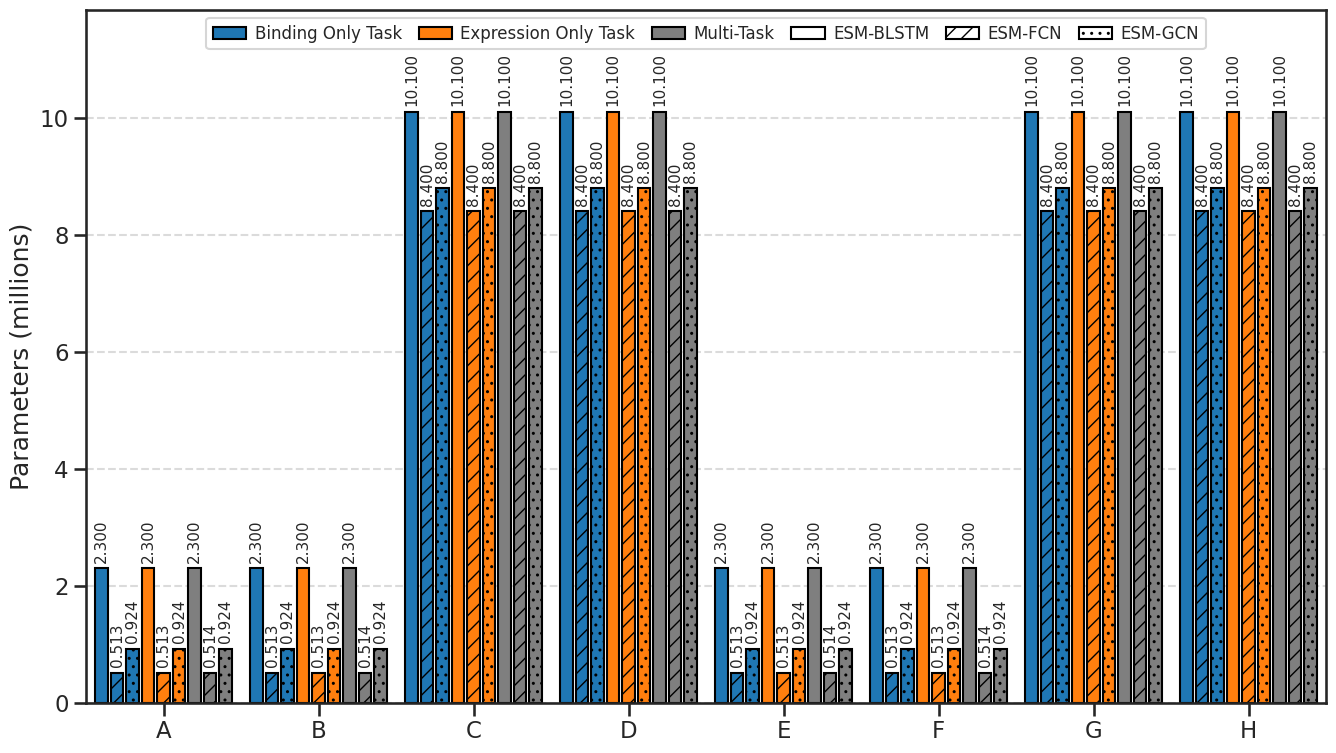

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from datetime import timedelta

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from datetime import datetime, timedelta

params_dict = {
    "ESM-BLSTM.A.single.binding": 2.3,
    "ESM-FCN.A.single.binding": 0.513,
    "ESM-GCN.A.single.binding": 0.924,
    "ESM-BLSTM.A.single.expression": 2.3,
    "ESM-FCN.A.single.expression": 0.513,
    "ESM-GCN.A.single.expression": 0.924,
    "ESM-BLSTM.A.multi": 2.3,
    "ESM-FCN.A.multi": 0.514,
    "ESM-GCN.A.multi": 0.924,

    "ESM-BLSTM.B.single.binding": 2.3,
    "ESM-FCN.B.single.binding": 0.513,
    "ESM-GCN.B.single.binding": 0.924,
    "ESM-BLSTM.B.single.expression": 2.3,
    "ESM-FCN.B.single.expression": 0.513,
    "ESM-GCN.B.single.expression": 0.924,
    "ESM-BLSTM.B.multi": 2.3,
    "ESM-FCN.B.multi": 0.514,
    "ESM-GCN.B.multi": 0.924,

    "ESM-BLSTM.C.single.binding": 10.1,
    "ESM-FCN.C.single.binding": 8.4,
    "ESM-GCN.C.single.binding": 8.8,
    "ESM-BLSTM.C.single.expression": 10.1,
    "ESM-FCN.C.single.expression": 8.4,
    "ESM-GCN.C.single.expression": 8.8,
    "ESM-BLSTM.C.multi": 10.1,
    "ESM-FCN.C.multi": 8.4,
    "ESM-GCN.C.multi": 8.8,

    "ESM-BLSTM.D.single.binding": 10.1,
    "ESM-FCN.D.single.binding": 8.4,
    "ESM-GCN.D.single.binding": 8.8,
    "ESM-BLSTM.D.single.expression": 10.1,
    "ESM-FCN.D.single.expression": 8.4,
    "ESM-GCN.D.single.expression": 8.8,
    "ESM-BLSTM.D.multi": 10.1,
    "ESM-FCN.D.multi": 8.4,
    "ESM-GCN.D.multi": 8.8,

    "ESM-BLSTM.E.single.binding": 2.3,
    "ESM-FCN.E.single.binding": 0.513,
    "ESM-GCN.E.single.binding": 0.924,
    "ESM-BLSTM.E.single.expression": 2.3,
    "ESM-FCN.E.single.expression": 0.513,
    "ESM-GCN.E.single.expression": 0.924,
    "ESM-BLSTM.E.multi": 2.3,
    "ESM-FCN.E.multi": 0.514,
    "ESM-GCN.E.multi": 0.924,

    "ESM-BLSTM.F.single.binding": 2.3,
    "ESM-FCN.F.single.binding": 0.513,
    "ESM-GCN.F.single.binding": 0.924,
    "ESM-BLSTM.F.single.expression": 2.3,
    "ESM-FCN.F.single.expression": 0.513,
    "ESM-GCN.F.single.expression": 0.924,
    "ESM-BLSTM.F.multi": 2.3,    
    "ESM-FCN.F.multi": 0.514,
    "ESM-GCN.F.multi": 0.924,

    "ESM-BLSTM.G.single.binding": 10.1,
    "ESM-FCN.G.single.binding": 8.4,
    "ESM-GCN.G.single.binding": 8.8,
    "ESM-BLSTM.G.single.expression": 10.1,
    "ESM-FCN.G.single.expression": 8.4,
    "ESM-GCN.G.single.expression": 8.8,
    "ESM-BLSTM.G.multi": 10.1,    
    "ESM-FCN.G.multi": 8.4,
    "ESM-GCN.G.multi": 8.8,

    "ESM-BLSTM.H.single.binding": 10.1,
    "ESM-FCN.H.single.binding": 8.4,
    "ESM-GCN.H.single.binding": 8.8,
    "ESM-BLSTM.H.single.expression": 10.1,
    "ESM-FCN.H.single.expression": 8.4,
    "ESM-GCN.H.single.expression": 8.8,    
    "ESM-BLSTM.H.multi": 10.1,
    "ESM-FCN.H.multi": 8.4,
    "ESM-GCN.H.multi": 8.8
}

def get_bar_color(label):
    if "binding" in label:
        return "tab:blue"
    elif "expression" in label:
        return "tab:orange"
    elif "multi" in label:
        return 'tab:grey'
    
def get_hatch(label):
    if label.startswith("ESM-FCN"):
        return "//"
    elif label.startswith("ESM-GCN"):
        return ".."
    else:
        return None

labels = list(params_dict.keys())
values = list(params_dict.values())
colors = [get_bar_color(label) for label in labels]
hatchs = [get_hatch(label) for label in labels]

# Custom spaced x positions
x_positions = []
gap = 1           # Extra space between groups
group_size = 9    # Bars per group

for i in range(len(labels)):
    group_index = i // group_size
    within_group_index = i % group_size
    position = group_index * (group_size + gap) + within_group_index
    x_positions.append(position)

# Plot setup 
sns.set_style("ticks")
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(16, 9))

bars = ax.bar(x_positions, values, color=colors, edgecolor='black', hatch=hatchs)

# Annotate values
for bar in bars:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.text(x, height + 0.1, f"{height:.3f}", ha="center", va="bottom", fontsize=11, rotation=90)

# Tick labels centered on 5th bar (index 4) in each 9-bar group 
xtick_labels = []
visible_ticks = []

for i in range(len(labels)):
    if i % group_size == 4:
        label = labels[i].split(".")[1]  # "A", "B", ...
        xtick_labels.append(label)
        visible_ticks.append(x_positions[i])
    else:
        xtick_labels.append("")

ax.set_xticks(x_positions)
ax.set_xticklabels(xtick_labels, rotation=0, ha="center")

# Hide tick marks not at group centers
for i, tick in enumerate(ax.get_xticklines()):
    # Each tick has 2 lines (bottom + top), so divide index by 2 to get position index
    tick_pos = i // 2
    if x_positions[tick_pos] not in visible_ticks:
        tick.set_visible(False)

ax.set_xlim(min(x_positions) - 1, max(x_positions) + 1)
ax.set_ylim(0, max(values) + 1.75)
ax.set_ylabel("Parameters (millions)")
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Legend
color_patches = [
    Patch(facecolor='tab:blue', edgecolor='black', label='Binding Only Task'),
    Patch(facecolor='tab:orange', edgecolor='black', label='Expression Only Task'),
    Patch(facecolor='tab:grey', edgecolor='black', label='Multi-Task')
]
hatch_patches = [
    Patch(facecolor='white', edgecolor='black', hatch=None, label='ESM-BLSTM'),
    Patch(facecolor='white', edgecolor='black', hatch='//', label='ESM-FCN'),
    Patch(facecolor='white', edgecolor='black', hatch='..', label='ESM-GCN')
]
ax.legend(handles=color_patches + hatch_patches, fontsize=12, loc='upper center', ncols=6, columnspacing=1, handletextpad=0.5)

save_path = "bar/paramaters"
plt.savefig(f"{save_path}.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.savefig(f"{save_path}.png", format='png', dpi=300, bbox_inches='tight')

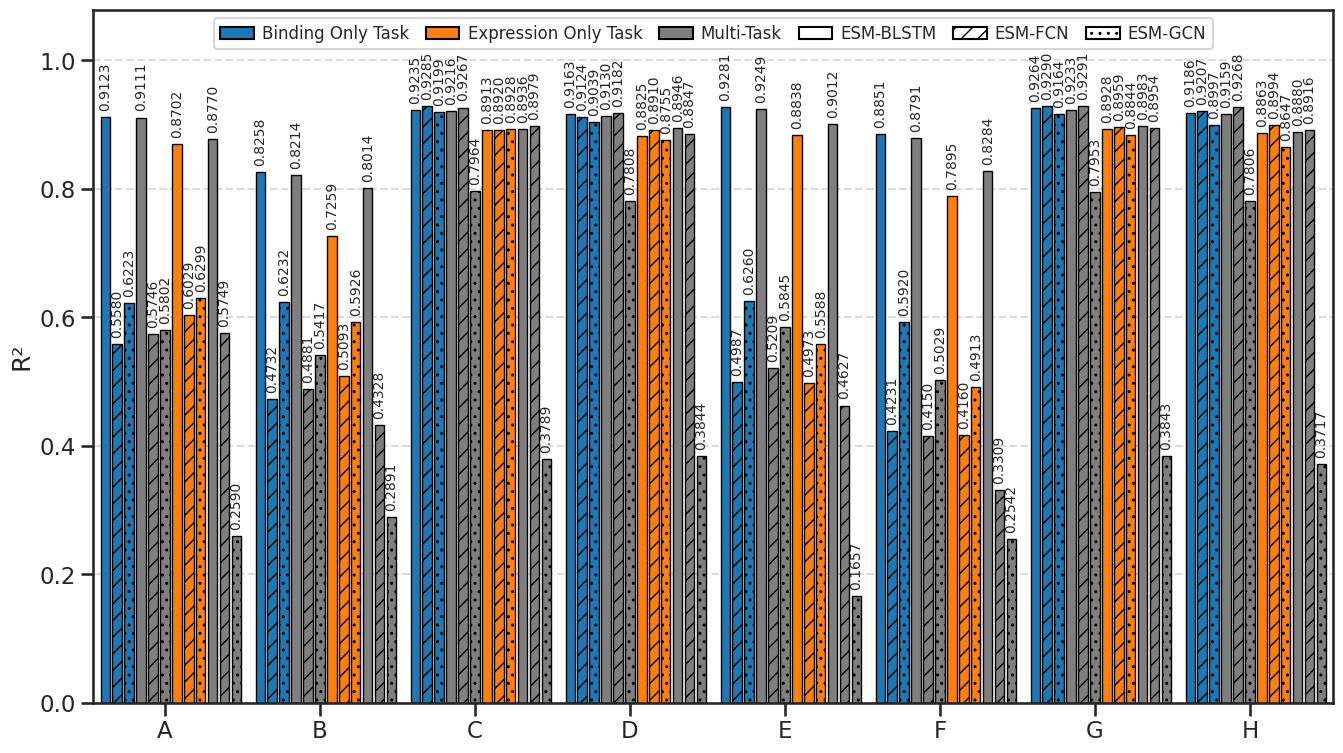

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from datetime import timedelta

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from datetime import datetime, timedelta

r2_dict = {    
    "ESM-BLSTM.A.single.binding": 0.9123066417042403,
    "ESM-FCN.A.single.binding": 0.5580311560166638,
    "ESM-GCN.A.single.binding": 0.6223320840124591, 
    "ESM-BLSTM.A.multi.binding": 0.9111441597775383, 
    "ESM-FCN.A.multi.binding": 0.5745769983686204, 
    "ESM-GCN.A.multi.binding": 0.5801805217032834, 
    "ESM-BLSTM.A.single.expression": 0.8702002818250768,
    "ESM-FCN.A.single.expression": 0.6029198131823257,
    "ESM-GCN.A.single.expression": 0.6299081382919702,
    "ESM-BLSTM.A.multi.expression": 0.877035855809535,
    "ESM-FCN.A.multi.expression": 0.5748689882266018,
    "ESM-GCN.A.multi.expression": 0.25901626737167327,

    "ESM-BLSTM.B.single.binding": 0.8258412759872309, 
    "ESM-FCN.B.single.binding": 0.4732420068931156, 
    "ESM-GCN.B.single.binding": 0.6231528276600872, 
    "ESM-BLSTM.B.multi.binding": 0.8214484587660857, 
    "ESM-FCN.B.multi.binding": 0.4880943402612158,
    "ESM-GCN.B.multi.binding": 0.5417112106429208, 
    "ESM-BLSTM.B.single.expression": 0.7259065204425392,
    "ESM-FCN.B.single.expression": 0.5092710524174124,
    "ESM-GCN.B.single.expression": 0.5926177410430962,
    "ESM-BLSTM.B.multi.expression": 0.8014032426437034,
    "ESM-FCN.B.multi.expression": 0.43275097103250737,
    "ESM-GCN.B.multi.expression": 0.28912539336795395,

    "ESM-BLSTM.C.single.binding": 0.9235298907644517, 
    "ESM-FCN.C.single.binding": 0.9285408371261771, 
    "ESM-GCN.C.single.binding": 0.9199186564939315, 
    "ESM-BLSTM.C.multi.binding": 0.92156355672298, 
    "ESM-FCN.C.multi.binding": 0.9267167522116847, 
    "ESM-GCN.C.multi.binding": 0.7963605894734448, 
    "ESM-BLSTM.C.single.expression": 0.8912604849599239,
    "ESM-FCN.C.single.expression": 0.8919883065575346,
    "ESM-GCN.C.single.expression": 0.8927694832955763,
    "ESM-BLSTM.C.multi.expression": 0.8935816152177674,    
    "ESM-FCN.C.multi.expression": 0.8978714600650055,
    "ESM-GCN.C.multi.expression": 0.37889686736716,

    "ESM-BLSTM.D.single.binding": 0.9163212912512362, 
    "ESM-FCN.D.single.binding": 0.9124399662643154, 
    "ESM-GCN.D.single.binding": 0.9038806813486306, 
    "ESM-BLSTM.D.multi.binding": 0.9129526080988646, 
    "ESM-FCN.D.multi.binding": 0.9181859560179784, 
    "ESM-GCN.D.multi.binding": 0.7808172769475568, 
    "ESM-BLSTM.D.single.expression": 0.8824982393395715,
    "ESM-FCN.D.single.expression": 0.8909847474534454,
    "ESM-GCN.D.single.expression": 0.875455388375682,
    "ESM-BLSTM.D.multi.expression": 0.8945815826229954,    
    "ESM-FCN.D.multi.expression": 0.8847088283577996,
    "ESM-GCN.D.multi.expression": 0.3843900179056514,

    "ESM-BLSTM.E.single.binding": 0.9280795433458673, 
    "ESM-FCN.E.single.binding": 0.49874635163677317, 
    "ESM-GCN.E.single.binding": 0.625986065495006, 
    "ESM-BLSTM.E.multi.binding": 0.9249419063003032, 
    "ESM-FCN.E.multi.binding": 0.5208971842435353, 
    "ESM-GCN.E.multi.binding": 0.5845440525671, 
    "ESM-BLSTM.E.single.expression": 0.8837608528511225,
    "ESM-FCN.E.single.expression": 0.49731968154370265,
    "ESM-GCN.E.single.expression": 0.5588155950380087,
    "ESM-BLSTM.E.multi.expression": 0.9011826407636426,    
    "ESM-FCN.E.multi.expression": 0.4626554667960624,
    "ESM-GCN.E.multi.expression": 0.16567661241261977,

    "ESM-BLSTM.F.single.binding": 0.8850920127270295, 
    "ESM-FCN.F.single.binding": 0.4231257937227506, 
    "ESM-GCN.F.single.binding": 0.5919726399364468, 
    "ESM-BLSTM.F.multi.binding": 0.879058369413313, 
    "ESM-FCN.F.multi.binding": 0.41499542031289405, 
    "ESM-GCN.F.multi.binding": 0.5028545457765108, 
    "ESM-BLSTM.F.single.expression": 0.7894515253730676,
    "ESM-FCN.F.single.expression": 0.41600394904150517,
    "ESM-GCN.F.single.expression": 0.49129026335418013,
    "ESM-BLSTM.F.multi.expression": 0.8284231141639246,    
    "ESM-FCN.F.multi.expression": 0.3309377509520771,
    "ESM-GCN.F.multi.expression": 0.25419138302115274,

    "ESM-BLSTM.G.single.binding": 0.9263503607043926, 
    "ESM-FCN.G.single.binding": 0.9290135762144694, 
    "ESM-GCN.G.single.binding": 0.9164182530019397,
    "ESM-BLSTM.G.multi.binding": 0.9233147053914923, 
    "ESM-FCN.G.multi.binding": 0.9291312027036983, 
    "ESM-GCN.G.multi.binding": 0.7952799829719348,     
    "ESM-BLSTM.G.single.expression": 0.8927753686230111,
    "ESM-FCN.G.single.expression": 0.8958578464582772,
    "ESM-GCN.G.single.expression": 0.8843692707214785,
    "ESM-BLSTM.G.multi.expression": 0.8982713737901816,
    "ESM-FCN.G.multi.expression": 0.8953969634891285,
    "ESM-GCN.G.multi.expression": 0.3843366986950859,

    "ESM-BLSTM.H.single.binding": 0.9185689353025653, 
    "ESM-FCN.H.single.binding": 0.9206958638584363, 
    "ESM-GCN.H.single.binding": 0.8996575171700016, 
    "ESM-BLSTM.H.multi.binding": 0.9158758103604825, 
    "ESM-FCN.H.multi.binding": 0.9268307702095957, 
    "ESM-GCN.H.multi.binding": 0.7806129934801138, 
    "ESM-BLSTM.H.single.expression": 0.886331116461862,
    "ESM-FCN.H.single.expression": 0.899383632237258,
    "ESM-GCN.H.single.expression": 0.8646748869896883,
    "ESM-BLSTM.H.multi.expression": 0.888044702394436,
    "ESM-FCN.H.multi.expression": 0.8916457305012047,
    "ESM-GCN.H.multi.expression": 0.3717064014171383
}

def get_bar_color(label):
    if "binding" in label and "single" in label:
        return "tab:blue"
    elif "expression" in label and "single" in label:
        return "tab:orange"
    elif "multi" in label:
        return "tab:grey"

def get_hatch(label):
    if label.startswith("ESM-FCN"):
        return "//"
    elif label.startswith("ESM-GCN"):
        return ".."
    else:
        return None

labels = list(r2_dict.keys())
values = list(r2_dict.values())
colors = [get_bar_color(label) for label in labels]
hatchs = [get_hatch(label) for label in labels]

# Custom spaced x positions
x_positions = []
gap = 1           # Extra space between groups
group_size = 12    # Bars per group

for i in range(len(labels)):
    group_index = i // group_size
    within_group_index = i % group_size
    position = group_index * (group_size + gap) + within_group_index
    x_positions.append(position)

# Plot setup 
sns.set_style("ticks")
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(16, 9))

bars = ax.bar(x_positions, values, color=colors, edgecolor='black', hatch=hatchs, linewidth=1)

# Annotate values
for bar in bars:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.text(x, height + 0.01, f"{height:.4f}", ha="center", va="bottom", fontsize=10, rotation=90)

# Tick labels centered on 6th bar (index 5) in each 12-bar group 
xtick_labels = []
visible_ticks = []

for i in range(len(labels)):
    if i % group_size == 5:
        label = labels[i].split(".")[1]  # "A", "B", ...
        xtick_labels.append(label)
        visible_ticks.append(x_positions[i])
    else:
        xtick_labels.append("")

ax.set_xticks(x_positions)
ax.set_xticklabels(xtick_labels, rotation=0, ha="center")

# Hide tick marks not at group centers
for i, tick in enumerate(ax.get_xticklines()):
    # Each tick has 2 lines (bottom + top), so divide index by 2 to get position index
    tick_pos = i // 2
    if x_positions[tick_pos] not in visible_ticks:
        tick.set_visible(False)

ax.set_xlim(min(x_positions) - 1, max(x_positions) + 1)
ax.set_ylim(0, max(values) + 0.15)
ax.set_ylabel("R²")
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Legend
color_patches = [
    Patch(facecolor='tab:blue', edgecolor='black', label='Binding Only Task'),
    Patch(facecolor='tab:orange', edgecolor='black', label='Expression Only Task'),
    Patch(facecolor='tab:grey', edgecolor='black', label='Multi-Task')
]
hatch_patches = [
    Patch(facecolor='white', edgecolor='black', hatch=None, label='ESM-BLSTM'),
    Patch(facecolor='white', edgecolor='black', hatch='//', label='ESM-FCN'),
    Patch(facecolor='white', edgecolor='black', hatch='..', label='ESM-GCN')
]
ax.legend(handles=color_patches + hatch_patches, fontsize=12, loc='upper center', ncols=6, columnspacing=1, handletextpad=0.5)

save_path = "bar/r2"
plt.savefig(f"{save_path}.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.savefig(f"{save_path}.png", format='png', dpi=300, bbox_inches='tight')


---
### Slimmed Down, Unfrozen Versions

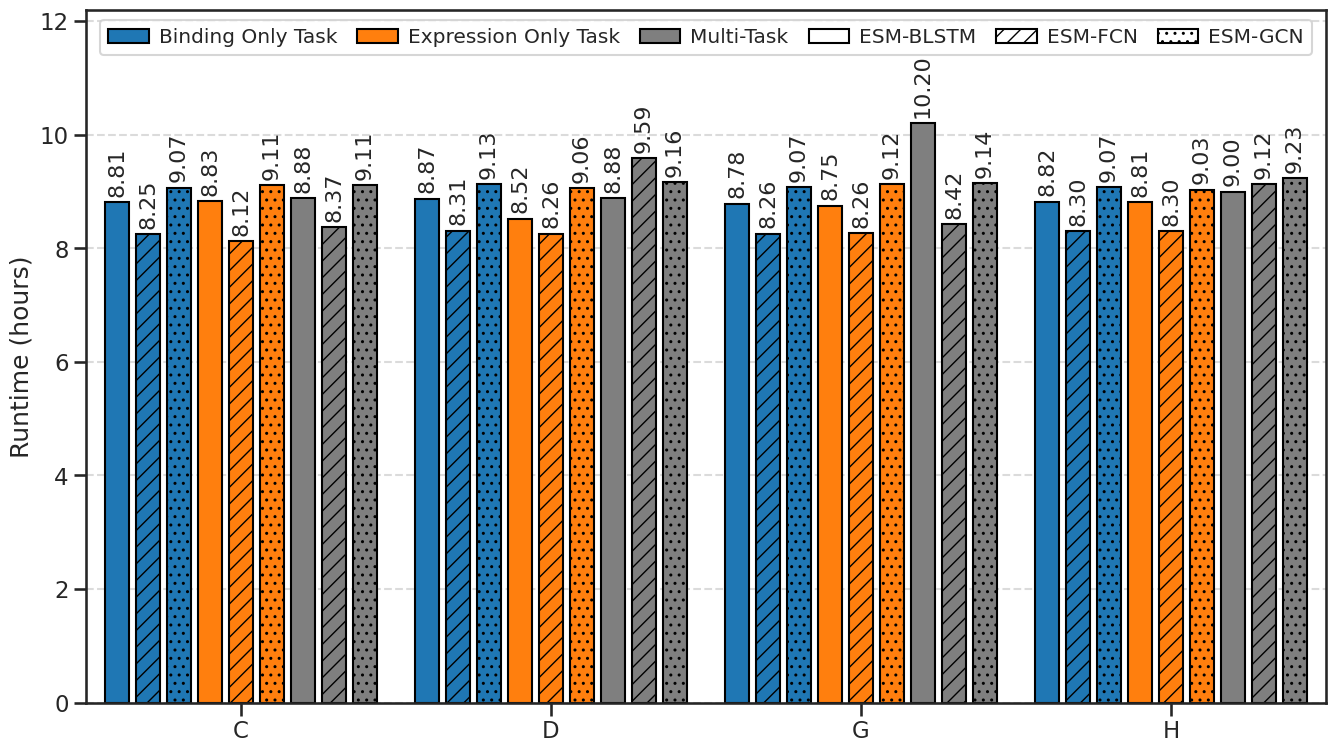

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from datetime import timedelta

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from datetime import datetime, timedelta

runtime_dict = {
    "ESM-BLSTM.C.single.binding": "8:48:20",
    "ESM-FCN.C.single.binding": "8:15:10",
    "ESM-GCN.C.single.binding": "9:04:07",
    "ESM-BLSTM.C.single.expression": "8:49:44",
    "ESM-FCN.C.single.expression": "8:07:27",
    "ESM-GCN.C.single.expression": "9:06:20",
    "ESM-BLSTM.C.multi": "8:52:56",    
    "ESM-FCN.C.multi": "8:22:08",
    "ESM-GCN.C.multi": "9:06:36",

    "ESM-BLSTM.D.single.binding": "8:52:22",
    "ESM-FCN.D.single.binding": "8:18:27",
    "ESM-GCN.D.single.binding": "9:07:35",
    "ESM-BLSTM.D.single.expression": "8:31:11",
    "ESM-FCN.D.single.expression": "8:15:27",
    "ESM-GCN.D.single.expression": "9:03:28",
    "ESM-BLSTM.D.multi": "8:52:45",
    "ESM-FCN.D.multi": "9:35:15",
    "ESM-GCN.D.multi": "9:09:29",

    "ESM-BLSTM.G.single.binding": "8:46:57",
    "ESM-FCN.G.single.binding": "8:15:31",
    "ESM-GCN.G.single.binding": "9:04:27",
    "ESM-BLSTM.G.single.expression": "8:44:59",
    "ESM-FCN.G.single.expression": "8:15:51",
    "ESM-GCN.G.single.expression": "9:07:29",
    "ESM-BLSTM.G.multi": "10:12:00",
    "ESM-FCN.G.multi": "8:25:27",
    "ESM-GCN.G.multi": "9:08:35",

    "ESM-BLSTM.H.single.binding": "8:49:15",
    "ESM-FCN.H.single.binding": "8:18:06",
    "ESM-GCN.H.single.binding": "9:04:16",
    "ESM-BLSTM.H.single.expression": "8:48:25",
    "ESM-FCN.H.single.expression": "8:18:15",
    "ESM-GCN.H.single.expression": "9:02:01",
    "ESM-BLSTM.H.multi": "8:59:49",
    "ESM-FCN.H.multi": "9:07:29",
    "ESM-GCN.H.multi": "9:13:58"
}

def parse_extended_time(time_str):
    hours, minutes, seconds = map(int, time_str.split(':'))
    td = timedelta(hours=hours, minutes=minutes, seconds=seconds)
    return td.total_seconds() / 3600

runtime_hours = {k: parse_extended_time(v) for k, v in runtime_dict.items()}

def get_bar_color(label):
    if "binding" in label:
        return "tab:blue"
    elif "expression" in label:
        return "tab:orange"
    elif "multi" in label:
        return 'tab:grey'
    
def get_hatch(label):
    if label.startswith("ESM-FCN"):
        return "//"
    elif label.startswith("ESM-GCN"):
        return ".."
    else:
        return None

labels = list(runtime_hours.keys())
values = list(runtime_hours.values())
colors = [get_bar_color(label) for label in labels]
hatchs = [get_hatch(label) for label in labels]

# Custom spaced x positions
x_positions = []
gap = 1           # Extra space between groups
group_size = 9    # Bars per group

for i in range(len(labels)):
    group_index = i // group_size
    within_group_index = i % group_size
    position = group_index * (group_size + gap) + within_group_index
    x_positions.append(position)

# Plot setup 
sns.set_style("ticks")
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(16, 9))

bars = ax.bar(x_positions, values, color=colors, edgecolor='black', hatch=hatchs)

# Annotate values
for bar in bars:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.text(x, height + 0.1, f"{height:.2f}", ha="center", va="bottom", fontsize=16, rotation=90)

# Tick labels centered on 5th bar (index 4) in each 9-bar group 
xtick_labels = []
visible_ticks = []

for i in range(len(labels)):
    if i % group_size == 4:
        label = labels[i].split(".")[1]  # "A", "B", ...
        xtick_labels.append(label)
        visible_ticks.append(x_positions[i])
    else:
        xtick_labels.append("")

ax.set_xticks(x_positions)
ax.set_xticklabels(xtick_labels, rotation=0, ha="center")

# Hide tick marks not at group centers
for i, tick in enumerate(ax.get_xticklines()):
    # Each tick has 2 lines (bottom + top), so divide index by 2 to get position index
    tick_pos = i // 2
    if x_positions[tick_pos] not in visible_ticks:
        tick.set_visible(False)

ax.set_xlim(min(x_positions) - 1, max(x_positions) + 1)
ax.set_ylim(0, max(values) + 2)
ax.set_ylabel("Runtime (hours)")
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Legend
color_patches = [
    Patch(facecolor='tab:blue', edgecolor='black', label='Binding Only Task'),
    Patch(facecolor='tab:orange', edgecolor='black', label='Expression Only Task'),
    Patch(facecolor='tab:grey', edgecolor='black', label='Multi-Task')
]
hatch_patches = [
    Patch(facecolor='white', edgecolor='black', hatch=None, label='ESM-BLSTM'),
    Patch(facecolor='white', edgecolor='black', hatch='//', label='ESM-FCN'),
    Patch(facecolor='white', edgecolor='black', hatch='..', label='ESM-GCN')
]
ax.legend(handles=color_patches + hatch_patches, fontsize=14.5, loc='upper center', ncols=6, columnspacing=1, handletextpad=0.5)

save_path = "bar/runtime_hours_slimmed_unfrozen"
plt.savefig(f"{save_path}.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.savefig(f"{save_path}.png", format='png', dpi=300, bbox_inches='tight')


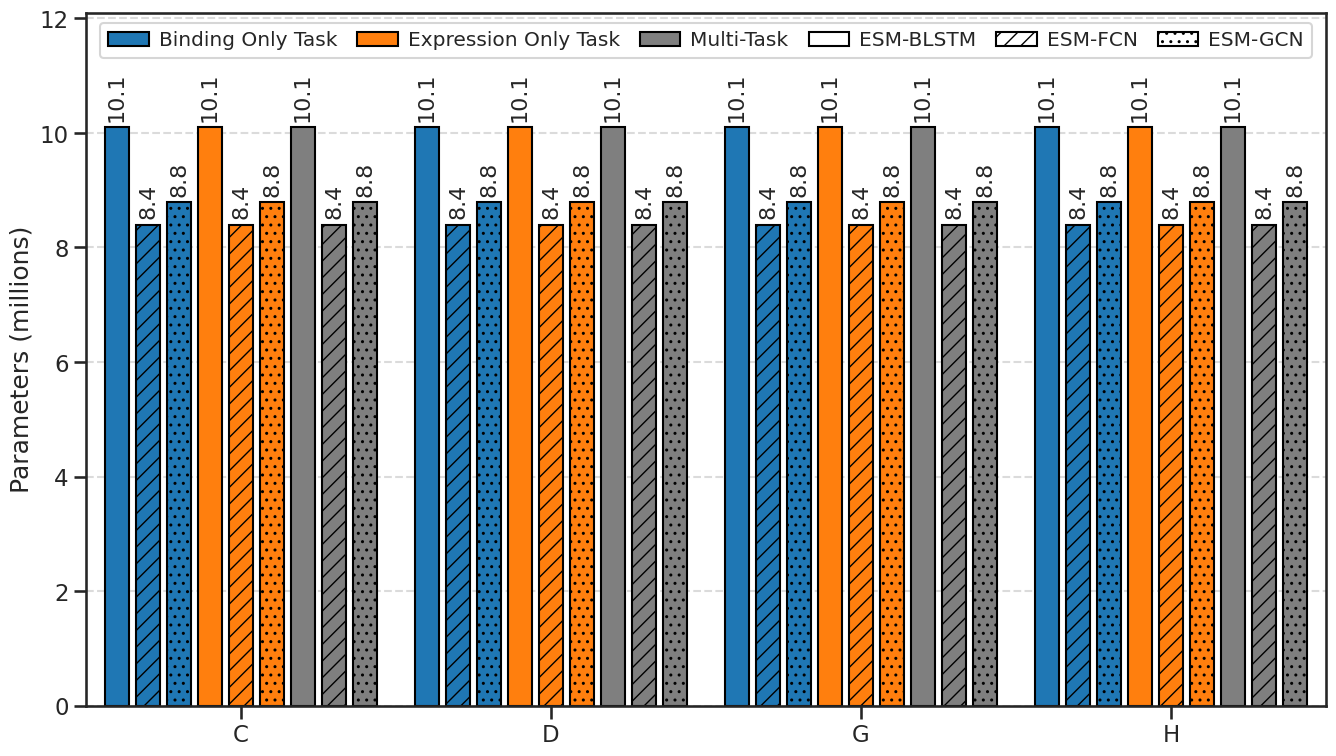

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from datetime import timedelta

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from datetime import datetime, timedelta

params_dict = {
    "ESM-BLSTM.C.single.binding": 10.1,
    "ESM-FCN.C.single.binding": 8.4,
    "ESM-GCN.C.single.binding": 8.8,
    "ESM-BLSTM.C.single.expression": 10.1,
    "ESM-FCN.C.single.expression": 8.4,
    "ESM-GCN.C.single.expression": 8.8,
    "ESM-BLSTM.C.multi": 10.1,
    "ESM-FCN.C.multi": 8.4,
    "ESM-GCN.C.multi": 8.8,

    "ESM-BLSTM.D.single.binding": 10.1,
    "ESM-FCN.D.single.binding": 8.4,
    "ESM-GCN.D.single.binding": 8.8,
    "ESM-BLSTM.D.single.expression": 10.1,
    "ESM-FCN.D.single.expression": 8.4,
    "ESM-GCN.D.single.expression": 8.8,
    "ESM-BLSTM.D.multi": 10.1,
    "ESM-FCN.D.multi": 8.4,
    "ESM-GCN.D.multi": 8.8,

    "ESM-BLSTM.G.single.binding": 10.1,
    "ESM-FCN.G.single.binding": 8.4,
    "ESM-GCN.G.single.binding": 8.8,
    "ESM-BLSTM.G.single.expression": 10.1,
    "ESM-FCN.G.single.expression": 8.4,
    "ESM-GCN.G.single.expression": 8.8,
    "ESM-BLSTM.G.multi": 10.1,    
    "ESM-FCN.G.multi": 8.4,
    "ESM-GCN.G.multi": 8.8,

    "ESM-BLSTM.H.single.binding": 10.1,
    "ESM-FCN.H.single.binding": 8.4,
    "ESM-GCN.H.single.binding": 8.8,
    "ESM-BLSTM.H.single.expression": 10.1,
    "ESM-FCN.H.single.expression": 8.4,
    "ESM-GCN.H.single.expression": 8.8,    
    "ESM-BLSTM.H.multi": 10.1,
    "ESM-FCN.H.multi": 8.4,
    "ESM-GCN.H.multi": 8.8
}

def get_bar_color(label):
    if "binding" in label:
        return "tab:blue"
    elif "expression" in label:
        return "tab:orange"
    elif "multi" in label:
        return 'tab:grey'
    
def get_hatch(label):
    if label.startswith("ESM-FCN"):
        return "//"
    elif label.startswith("ESM-GCN"):
        return ".."
    else:
        return None

labels = list(params_dict.keys())
values = list(params_dict.values())
colors = [get_bar_color(label) for label in labels]
hatchs = [get_hatch(label) for label in labels]

# Custom spaced x positions
x_positions = []
gap = 1           # Extra space between groups
group_size = 9    # Bars per group

for i in range(len(labels)):
    group_index = i // group_size
    within_group_index = i % group_size
    position = group_index * (group_size + gap) + within_group_index
    x_positions.append(position)

# Plot setup 
sns.set_style("ticks")
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(16, 9))

bars = ax.bar(x_positions, values, color=colors, edgecolor='black', hatch=hatchs)

# Annotate values
for bar in bars:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.text(x, height + 0.1, f"{height:.1f}", ha="center", va="bottom", fontsize=16, rotation=90)

# Tick labels centered on 5th bar (index 4) in each 9-bar group 
xtick_labels = []
visible_ticks = []

for i in range(len(labels)):
    if i % group_size == 4:
        label = labels[i].split(".")[1]  # "A", "B", ...
        xtick_labels.append(label)
        visible_ticks.append(x_positions[i])
    else:
        xtick_labels.append("")

ax.set_xticks(x_positions)
ax.set_xticklabels(xtick_labels, rotation=0, ha="center")

# Hide tick marks not at group centers
for i, tick in enumerate(ax.get_xticklines()):
    # Each tick has 2 lines (bottom + top), so divide index by 2 to get position index
    tick_pos = i // 2
    if x_positions[tick_pos] not in visible_ticks:
        tick.set_visible(False)

ax.set_xlim(min(x_positions) - 1, max(x_positions) + 1)
ax.set_ylim(0, max(values) + 2)
ax.set_ylabel("Parameters (millions)")
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Legend
color_patches = [
    Patch(facecolor='tab:blue', edgecolor='black', label='Binding Only Task'),
    Patch(facecolor='tab:orange', edgecolor='black', label='Expression Only Task'),
    Patch(facecolor='tab:grey', edgecolor='black', label='Multi-Task')
]
hatch_patches = [
    Patch(facecolor='white', edgecolor='black', hatch=None, label='ESM-BLSTM'),
    Patch(facecolor='white', edgecolor='black', hatch='//', label='ESM-FCN'),
    Patch(facecolor='white', edgecolor='black', hatch='..', label='ESM-GCN')
]
ax.legend(handles=color_patches + hatch_patches, fontsize=14.5,loc='upper center', ncols=6, columnspacing=1, handletextpad=0.5)

save_path = "bar/paramaters_slimmed_unfrozen"
plt.savefig(f"{save_path}.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.savefig(f"{save_path}.png", format='png', dpi=300, bbox_inches='tight')

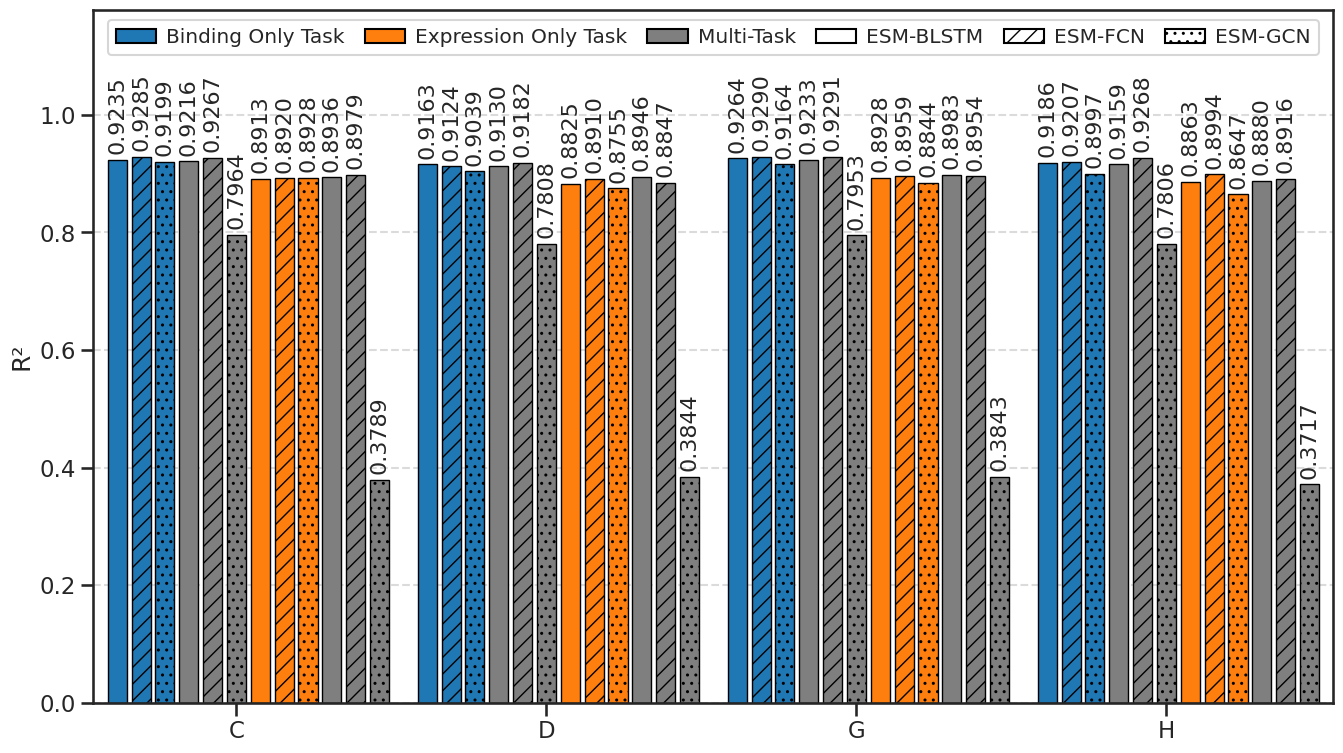

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from datetime import timedelta

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from datetime import datetime, timedelta

r2_dict = {    
    "ESM-BLSTM.C.single.binding": 0.9235298907644517, 
    "ESM-FCN.C.single.binding": 0.9285408371261771, 
    "ESM-GCN.C.single.binding": 0.9199186564939315, 
    "ESM-BLSTM.C.multi.binding": 0.92156355672298, 
    "ESM-FCN.C.multi.binding": 0.9267167522116847, 
    "ESM-GCN.C.multi.binding": 0.7963605894734448, 
    "ESM-BLSTM.C.single.expression": 0.8912604849599239,
    "ESM-FCN.C.single.expression": 0.8919883065575346,
    "ESM-GCN.C.single.expression": 0.8927694832955763,
    "ESM-BLSTM.C.multi.expression": 0.8935816152177674,    
    "ESM-FCN.C.multi.expression": 0.8978714600650055,
    "ESM-GCN.C.multi.expression": 0.37889686736716,

    "ESM-BLSTM.D.single.binding": 0.9163212912512362, 
    "ESM-FCN.D.single.binding": 0.9124399662643154, 
    "ESM-GCN.D.single.binding": 0.9038806813486306, 
    "ESM-BLSTM.D.multi.binding": 0.9129526080988646, 
    "ESM-FCN.D.multi.binding": 0.9181859560179784, 
    "ESM-GCN.D.multi.binding": 0.7808172769475568, 
    "ESM-BLSTM.D.single.expression": 0.8824982393395715,
    "ESM-FCN.D.single.expression": 0.8909847474534454,
    "ESM-GCN.D.single.expression": 0.875455388375682,
    "ESM-BLSTM.D.multi.expression": 0.8945815826229954,    
    "ESM-FCN.D.multi.expression": 0.8847088283577996,
    "ESM-GCN.D.multi.expression": 0.3843900179056514,

    "ESM-BLSTM.G.single.binding": 0.9263503607043926, 
    "ESM-FCN.G.single.binding": 0.9290135762144694, 
    "ESM-GCN.G.single.binding": 0.9164182530019397,
    "ESM-BLSTM.G.multi.binding": 0.9233147053914923, 
    "ESM-FCN.G.multi.binding": 0.9291312027036983, 
    "ESM-GCN.G.multi.binding": 0.7952799829719348,     
    "ESM-BLSTM.G.single.expression": 0.8927753686230111,
    "ESM-FCN.G.single.expression": 0.8958578464582772,
    "ESM-GCN.G.single.expression": 0.8843692707214785,
    "ESM-BLSTM.G.multi.expression": 0.8982713737901816,
    "ESM-FCN.G.multi.expression": 0.8953969634891285,
    "ESM-GCN.G.multi.expression": 0.3843366986950859,

    "ESM-BLSTM.H.single.binding": 0.9185689353025653, 
    "ESM-FCN.H.single.binding": 0.9206958638584363, 
    "ESM-GCN.H.single.binding": 0.8996575171700016, 
    "ESM-BLSTM.H.multi.binding": 0.9158758103604825, 
    "ESM-FCN.H.multi.binding": 0.9268307702095957, 
    "ESM-GCN.H.multi.binding": 0.7806129934801138, 
    "ESM-BLSTM.H.single.expression": 0.886331116461862,
    "ESM-FCN.H.single.expression": 0.899383632237258,
    "ESM-GCN.H.single.expression": 0.8646748869896883,
    "ESM-BLSTM.H.multi.expression": 0.888044702394436,
    "ESM-FCN.H.multi.expression": 0.8916457305012047,
    "ESM-GCN.H.multi.expression": 0.3717064014171383
}

def get_bar_color(label):
    if "binding" in label and "single" in label:
        return "tab:blue"
    elif "expression" in label and "single" in label:
        return "tab:orange"
    elif "multi" in label:
        return "tab:grey"

def get_hatch(label):
    if label.startswith("ESM-FCN"):
        return "//"
    elif label.startswith("ESM-GCN"):
        return ".."
    else:
        return None

labels = list(r2_dict.keys())
values = list(r2_dict.values())
colors = [get_bar_color(label) for label in labels]
hatchs = [get_hatch(label) for label in labels]

# Custom spaced x positions
x_positions = []
gap = 1           # Extra space between groups
group_size = 12    # Bars per group

for i in range(len(labels)):
    group_index = i // group_size
    within_group_index = i % group_size
    position = group_index * (group_size + gap) + within_group_index
    x_positions.append(position)

# Plot setup 
sns.set_style("ticks")
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(16, 9))

bars = ax.bar(x_positions, values, color=colors, edgecolor='black', hatch=hatchs, linewidth=1)

# Annotate values
for bar in bars:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.text(x, height + 0.01, f"{height:.4f}", ha="center", va="bottom", fontsize=16, rotation=90)

# Tick labels centered on 6th bar (index 5) in each 12-bar group 
xtick_labels = []
visible_ticks = []

for i in range(len(labels)):
    if i % group_size == 5:
        label = labels[i].split(".")[1]  # "A", "B", ...
        xtick_labels.append(label)
        visible_ticks.append(x_positions[i])
    else:
        xtick_labels.append("")

ax.set_xticks(x_positions)
ax.set_xticklabels(xtick_labels, rotation=0, ha="center")

# Hide tick marks not at group centers
for i, tick in enumerate(ax.get_xticklines()):
    # Each tick has 2 lines (bottom + top), so divide index by 2 to get position index
    tick_pos = i // 2
    if x_positions[tick_pos] not in visible_ticks:
        tick.set_visible(False)

ax.set_xlim(min(x_positions) - 1, max(x_positions) + 1)
ax.set_ylim(0, max(values) + 0.25)
ax.set_ylabel("R²")
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Legend
color_patches = [
    Patch(facecolor='tab:blue', edgecolor='black', label='Binding Only Task'),
    Patch(facecolor='tab:orange', edgecolor='black', label='Expression Only Task'),
    Patch(facecolor='tab:grey', edgecolor='black', label='Multi-Task')
]
hatch_patches = [
    Patch(facecolor='white', edgecolor='black', hatch=None, label='ESM-BLSTM'),
    Patch(facecolor='white', edgecolor='black', hatch='//', label='ESM-FCN'),
    Patch(facecolor='white', edgecolor='black', hatch='..', label='ESM-GCN')
]
ax.legend(handles=color_patches + hatch_patches, fontsize=14.5, loc='upper center', ncols=6, columnspacing=1, handletextpad=0.5)

save_path = "bar/r2_slimmed_unfrozen"
plt.savefig(f"{save_path}.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.savefig(f"{save_path}.png", format='png', dpi=300, bbox_inches='tight')


---
### Slimmed Down, Frozen Versions

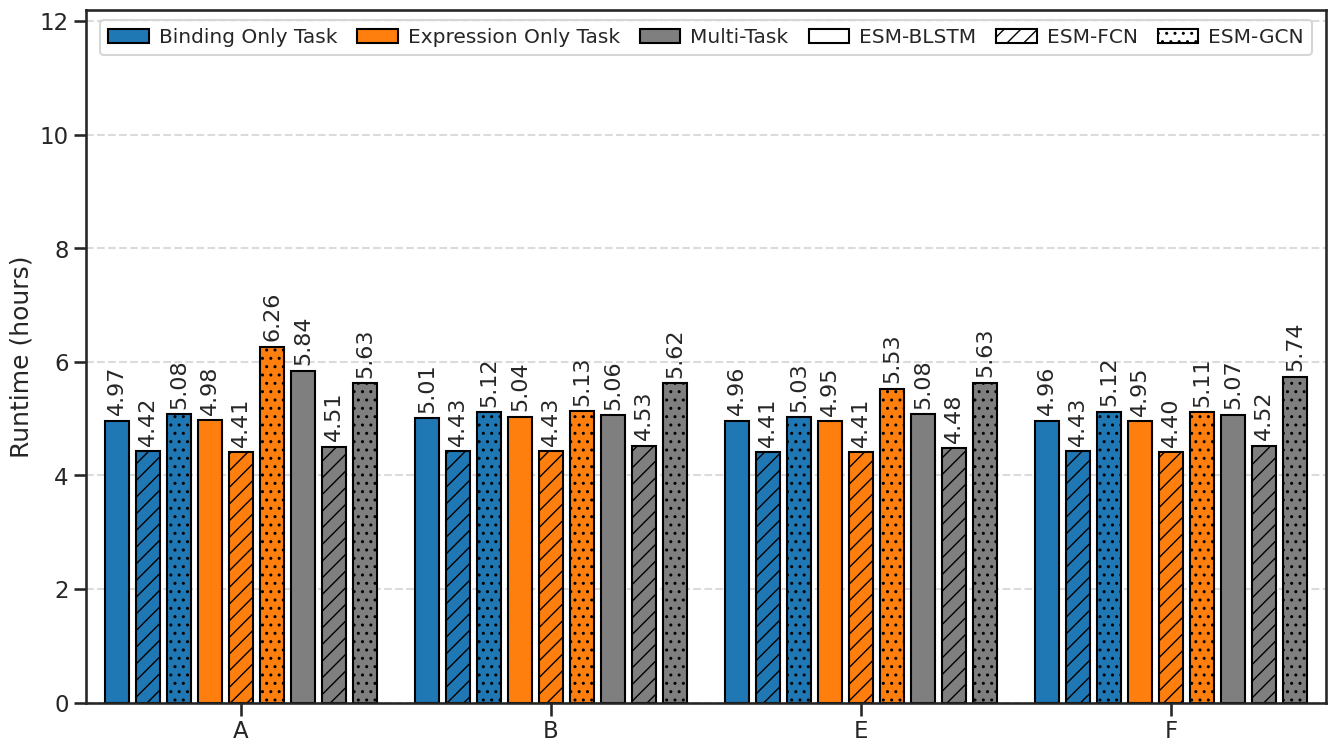

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from datetime import timedelta

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from datetime import datetime, timedelta

runtime_dict = {
    "ESM-BLSTM.A.single.binding": "4:57:59",
    "ESM-FCN.A.single.binding": "4:25:17",
    "ESM-GCN.A.single.binding": "5:04:59",
    "ESM-BLSTM.A.single.expression": "4:58:43",
    "ESM-FCN.A.single.expression": "4:24:32",
    "ESM-GCN.A.single.expression": "6:15:51",
    "ESM-BLSTM.A.multi": "5:50:31",
    "ESM-FCN.A.multi": "4:30:31",
    "ESM-GCN.A.multi": "5:37:36",

    "ESM-BLSTM.B.single.binding": "5:00:28",
    "ESM-FCN.B.single.binding": "4:25:45",
    "ESM-GCN.B.single.binding": "5:07:00",
    "ESM-BLSTM.B.single.expression": "5:02:12",
    "ESM-FCN.B.single.expression": "4:25:57",
    "ESM-GCN.B.single.expression": "5:07:41",
    "ESM-BLSTM.B.multi": "5:03:19",
    "ESM-FCN.B.multi": "4:31:36",
    "ESM-GCN.B.multi": "5:37:07",

    "ESM-BLSTM.E.single.binding": "4:57:46",
    "ESM-FCN.E.single.binding": "4:24:41",
    "ESM-GCN.E.single.binding": "5:01:38",
    "ESM-BLSTM.E.single.expression": "4:57:03",
    "ESM-FCN.E.single.expression": "4:24:53",
    "ESM-GCN.E.single.expression": "5:31:30",
    "ESM-BLSTM.E.multi": "5:04:47",
    "ESM-FCN.E.multi": "4:28:38",
    "ESM-GCN.E.multi": "5:37:57",

    "ESM-BLSTM.F.single.binding": "4:57:44",
    "ESM-FCN.F.single.binding": "4:25:31",
    "ESM-GCN.F.single.binding": "5:07:26",
    "ESM-BLSTM.F.single.expression": "4:57:03",
    "ESM-FCN.F.single.expression": "4:24:14",
    "ESM-GCN.F.single.expression": "5:06:29",    
    "ESM-BLSTM.F.multi": "5:04:11",
    "ESM-FCN.F.multi": "4:31:19",
    "ESM-GCN.F.multi": "5:44:11",
}

def parse_extended_time(time_str):
    hours, minutes, seconds = map(int, time_str.split(':'))
    td = timedelta(hours=hours, minutes=minutes, seconds=seconds)
    return td.total_seconds() / 3600

runtime_hours = {k: parse_extended_time(v) for k, v in runtime_dict.items()}

def get_bar_color(label):
    if "binding" in label:
        return "tab:blue"
    elif "expression" in label:
        return "tab:orange"
    elif "multi" in label:
        return 'tab:grey'
    
def get_hatch(label):
    if label.startswith("ESM-FCN"):
        return "//"
    elif label.startswith("ESM-GCN"):
        return ".."
    else:
        return None

labels = list(runtime_hours.keys())
values = list(runtime_hours.values())
colors = [get_bar_color(label) for label in labels]
hatchs = [get_hatch(label) for label in labels]

# Custom spaced x positions
x_positions = []
gap = 1           # Extra space between groups
group_size = 9    # Bars per group

for i in range(len(labels)):
    group_index = i // group_size
    within_group_index = i % group_size
    position = group_index * (group_size + gap) + within_group_index
    x_positions.append(position)

# Plot setup 
sns.set_style("ticks")
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(16, 9))

bars = ax.bar(x_positions, values, color=colors, edgecolor='black', hatch=hatchs)

# Annotate values
for bar in bars:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.text(x, height + 0.1, f"{height:.2f}", ha="center", va="bottom", fontsize=16, rotation=90)

# Tick labels centered on 5th bar (index 4) in each 9-bar group 
xtick_labels = []
visible_ticks = []

for i in range(len(labels)):
    if i % group_size == 4:
        label = labels[i].split(".")[1]  # "A", "B", ...
        xtick_labels.append(label)
        visible_ticks.append(x_positions[i])
    else:
        xtick_labels.append("")

ax.set_xticks(x_positions)
ax.set_xticklabels(xtick_labels, rotation=0, ha="center")

# Hide tick marks not at group centers
for i, tick in enumerate(ax.get_xticklines()):
    # Each tick has 2 lines (bottom + top), so divide index by 2 to get position index
    tick_pos = i // 2
    if x_positions[tick_pos] not in visible_ticks:
        tick.set_visible(False)

ax.set_xlim(min(x_positions) - 1, max(x_positions) + 1)
ax.set_ylim(0, 10.20 + 2)
ax.set_ylabel("Runtime (hours)")
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Legend
color_patches = [
    Patch(facecolor='tab:blue', edgecolor='black', label='Binding Only Task'),
    Patch(facecolor='tab:orange', edgecolor='black', label='Expression Only Task'),
    Patch(facecolor='tab:grey', edgecolor='black', label='Multi-Task')
]
hatch_patches = [
    Patch(facecolor='white', edgecolor='black', hatch=None, label='ESM-BLSTM'),
    Patch(facecolor='white', edgecolor='black', hatch='//', label='ESM-FCN'),
    Patch(facecolor='white', edgecolor='black', hatch='..', label='ESM-GCN')
]
ax.legend(handles=color_patches + hatch_patches, fontsize=14.5, loc='upper center', ncols=6, columnspacing=1, handletextpad=0.5)

save_path = "bar/runtime_hours_slimmed_frozen"
plt.savefig(f"{save_path}.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.savefig(f"{save_path}.png", format='png', dpi=300, bbox_inches='tight')

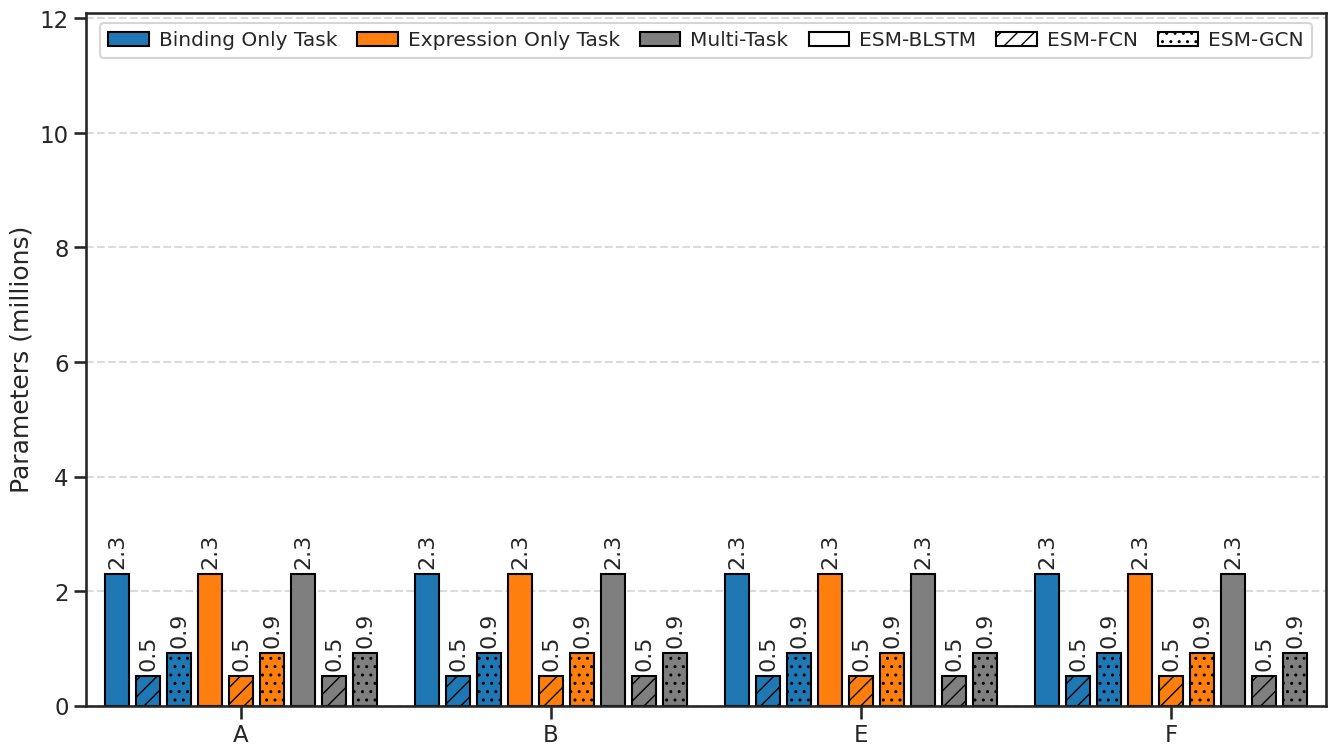

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from datetime import timedelta

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from datetime import datetime, timedelta

params_dict = {
    "ESM-BLSTM.A.single.binding": 2.3,
    "ESM-FCN.A.single.binding": 0.513,
    "ESM-GCN.A.single.binding": 0.924,
    "ESM-BLSTM.A.single.expression": 2.3,
    "ESM-FCN.A.single.expression": 0.513,
    "ESM-GCN.A.single.expression": 0.924,
    "ESM-BLSTM.A.multi": 2.3,
    "ESM-FCN.A.multi": 0.514,
    "ESM-GCN.A.multi": 0.924,

    "ESM-BLSTM.B.single.binding": 2.3,
    "ESM-FCN.B.single.binding": 0.513,
    "ESM-GCN.B.single.binding": 0.924,
    "ESM-BLSTM.B.single.expression": 2.3,
    "ESM-FCN.B.single.expression": 0.513,
    "ESM-GCN.B.single.expression": 0.924,
    "ESM-BLSTM.B.multi": 2.3,
    "ESM-FCN.B.multi": 0.514,
    "ESM-GCN.B.multi": 0.924,

    "ESM-BLSTM.E.single.binding": 2.3,
    "ESM-FCN.E.single.binding": 0.513,
    "ESM-GCN.E.single.binding": 0.924,
    "ESM-BLSTM.E.single.expression": 2.3,
    "ESM-FCN.E.single.expression": 0.513,
    "ESM-GCN.E.single.expression": 0.924,
    "ESM-BLSTM.E.multi": 2.3,
    "ESM-FCN.E.multi": 0.514,
    "ESM-GCN.E.multi": 0.924,

    "ESM-BLSTM.F.single.binding": 2.3,
    "ESM-FCN.F.single.binding": 0.513,
    "ESM-GCN.F.single.binding": 0.924,
    "ESM-BLSTM.F.single.expression": 2.3,
    "ESM-FCN.F.single.expression": 0.513,
    "ESM-GCN.F.single.expression": 0.924,
    "ESM-BLSTM.F.multi": 2.3,    
    "ESM-FCN.F.multi": 0.514,
    "ESM-GCN.F.multi": 0.924
}

def get_bar_color(label):
    if "binding" in label:
        return "tab:blue"
    elif "expression" in label:
        return "tab:orange"
    elif "multi" in label:
        return 'tab:grey'
    
def get_hatch(label):
    if label.startswith("ESM-FCN"):
        return "//"
    elif label.startswith("ESM-GCN"):
        return ".."
    else:
        return None

labels = list(params_dict.keys())
values = list(params_dict.values())
colors = [get_bar_color(label) for label in labels]
hatchs = [get_hatch(label) for label in labels]

# Custom spaced x positions
x_positions = []
gap = 1           # Extra space between groups
group_size = 9    # Bars per group

for i in range(len(labels)):
    group_index = i // group_size
    within_group_index = i % group_size
    position = group_index * (group_size + gap) + within_group_index
    x_positions.append(position)

# Plot setup 
sns.set_style("ticks")
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(16, 9))

bars = ax.bar(x_positions, values, color=colors, edgecolor='black', hatch=hatchs)

# Annotate values
for bar in bars:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.text(x, height + 0.1, f"{height:.1f}", ha="center", va="bottom", fontsize=16, rotation=90)

# Tick labels centered on 5th bar (index 4) in each 9-bar group 
xtick_labels = []
visible_ticks = []

for i in range(len(labels)):
    if i % group_size == 4:
        label = labels[i].split(".")[1]  # "A", "B", ...
        xtick_labels.append(label)
        visible_ticks.append(x_positions[i])
    else:
        xtick_labels.append("")

ax.set_xticks(x_positions)
ax.set_xticklabels(xtick_labels, rotation=0, ha="center")

# Hide tick marks not at group centers
for i, tick in enumerate(ax.get_xticklines()):
    # Each tick has 2 lines (bottom + top), so divide index by 2 to get position index
    tick_pos = i // 2
    if x_positions[tick_pos] not in visible_ticks:
        tick.set_visible(False)

ax.set_xlim(min(x_positions) - 1, max(x_positions) + 1)
ax.set_ylim(0, 10.1 + 2)
ax.set_ylabel("Parameters (millions)")
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Legend
color_patches = [
    Patch(facecolor='tab:blue', edgecolor='black', label='Binding Only Task'),
    Patch(facecolor='tab:orange', edgecolor='black', label='Expression Only Task'),
    Patch(facecolor='tab:grey', edgecolor='black', label='Multi-Task')
]
hatch_patches = [
    Patch(facecolor='white', edgecolor='black', hatch=None, label='ESM-BLSTM'),
    Patch(facecolor='white', edgecolor='black', hatch='//', label='ESM-FCN'),
    Patch(facecolor='white', edgecolor='black', hatch='..', label='ESM-GCN')
]
ax.legend(handles=color_patches + hatch_patches, fontsize=14.5,loc='upper center', ncols=6, columnspacing=1, handletextpad=0.5)

save_path = "bar/paramaters_slimmed_frozen"
plt.savefig(f"{save_path}.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.savefig(f"{save_path}.png", format='png', dpi=300, bbox_inches='tight')

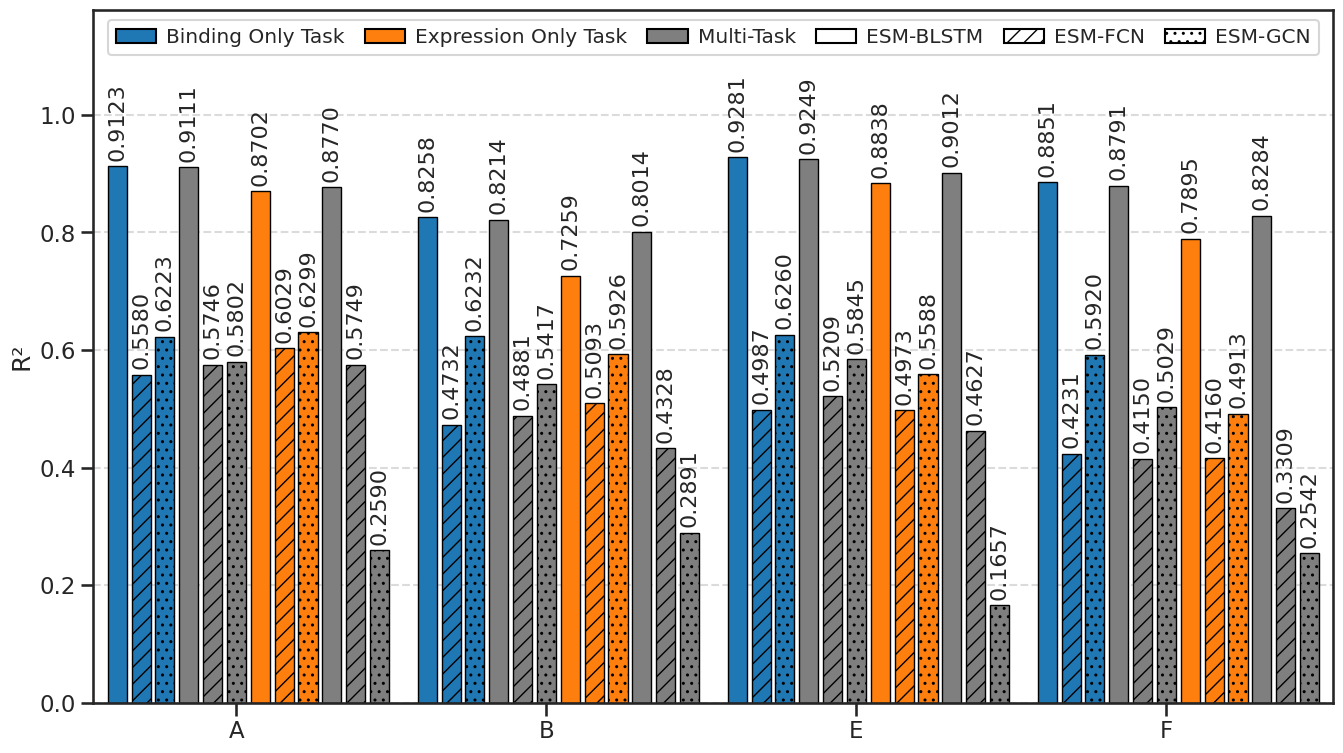

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from datetime import timedelta

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from datetime import datetime, timedelta

r2_dict = {    
    "ESM-BLSTM.A.single.binding": 0.9123066417042403,
    "ESM-FCN.A.single.binding": 0.5580311560166638,
    "ESM-GCN.A.single.binding": 0.6223320840124591, 
    "ESM-BLSTM.A.multi.binding": 0.9111441597775383, 
    "ESM-FCN.A.multi.binding": 0.5745769983686204, 
    "ESM-GCN.A.multi.binding": 0.5801805217032834, 
    "ESM-BLSTM.A.single.expression": 0.8702002818250768,
    "ESM-FCN.A.single.expression": 0.6029198131823257,
    "ESM-GCN.A.single.expression": 0.6299081382919702,
    "ESM-BLSTM.A.multi.expression": 0.877035855809535,
    "ESM-FCN.A.multi.expression": 0.5748689882266018,
    "ESM-GCN.A.multi.expression": 0.25901626737167327,

    "ESM-BLSTM.B.single.binding": 0.8258412759872309, 
    "ESM-FCN.B.single.binding": 0.4732420068931156, 
    "ESM-GCN.B.single.binding": 0.6231528276600872, 
    "ESM-BLSTM.B.multi.binding": 0.8214484587660857, 
    "ESM-FCN.B.multi.binding": 0.4880943402612158,
    "ESM-GCN.B.multi.binding": 0.5417112106429208, 
    "ESM-BLSTM.B.single.expression": 0.7259065204425392,
    "ESM-FCN.B.single.expression": 0.5092710524174124,
    "ESM-GCN.B.single.expression": 0.5926177410430962,
    "ESM-BLSTM.B.multi.expression": 0.8014032426437034,
    "ESM-FCN.B.multi.expression": 0.43275097103250737,
    "ESM-GCN.B.multi.expression": 0.28912539336795395,

    "ESM-BLSTM.E.single.binding": 0.9280795433458673, 
    "ESM-FCN.E.single.binding": 0.49874635163677317, 
    "ESM-GCN.E.single.binding": 0.625986065495006, 
    "ESM-BLSTM.E.multi.binding": 0.9249419063003032, 
    "ESM-FCN.E.multi.binding": 0.5208971842435353, 
    "ESM-GCN.E.multi.binding": 0.5845440525671, 
    "ESM-BLSTM.E.single.expression": 0.8837608528511225,
    "ESM-FCN.E.single.expression": 0.49731968154370265,
    "ESM-GCN.E.single.expression": 0.5588155950380087,
    "ESM-BLSTM.E.multi.expression": 0.9011826407636426,    
    "ESM-FCN.E.multi.expression": 0.4626554667960624,
    "ESM-GCN.E.multi.expression": 0.16567661241261977,

    "ESM-BLSTM.F.single.binding": 0.8850920127270295, 
    "ESM-FCN.F.single.binding": 0.4231257937227506, 
    "ESM-GCN.F.single.binding": 0.5919726399364468, 
    "ESM-BLSTM.F.multi.binding": 0.879058369413313, 
    "ESM-FCN.F.multi.binding": 0.41499542031289405, 
    "ESM-GCN.F.multi.binding": 0.5028545457765108, 
    "ESM-BLSTM.F.single.expression": 0.7894515253730676,
    "ESM-FCN.F.single.expression": 0.41600394904150517,
    "ESM-GCN.F.single.expression": 0.49129026335418013,
    "ESM-BLSTM.F.multi.expression": 0.8284231141639246,    
    "ESM-FCN.F.multi.expression": 0.3309377509520771,
    "ESM-GCN.F.multi.expression": 0.25419138302115274,
}

def get_bar_color(label):
    if "binding" in label and "single" in label:
        return "tab:blue"
    elif "expression" in label and "single" in label:
        return "tab:orange"
    elif "multi" in label:
        return "tab:grey"

def get_hatch(label):
    if label.startswith("ESM-FCN"):
        return "//"
    elif label.startswith("ESM-GCN"):
        return ".."
    else:
        return None

labels = list(r2_dict.keys())
values = list(r2_dict.values())
colors = [get_bar_color(label) for label in labels]
hatchs = [get_hatch(label) for label in labels]

# Custom spaced x positions
x_positions = []
gap = 1           # Extra space between groups
group_size = 12    # Bars per group

for i in range(len(labels)):
    group_index = i // group_size
    within_group_index = i % group_size
    position = group_index * (group_size + gap) + within_group_index
    x_positions.append(position)

# Plot setup 
sns.set_style("ticks")
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(16, 9))

bars = ax.bar(x_positions, values, color=colors, edgecolor='black', hatch=hatchs, linewidth=1)

# Annotate values
for bar in bars:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.text(x, height + 0.01, f"{height:.4f}", ha="center", va="bottom", fontsize=16, rotation=90)

# Tick labels centered on 6th bar (index 5) in each 12-bar group 
xtick_labels = []
visible_ticks = []

for i in range(len(labels)):
    if i % group_size == 5:
        label = labels[i].split(".")[1]  # "A", "B", ...
        xtick_labels.append(label)
        visible_ticks.append(x_positions[i])
    else:
        xtick_labels.append("")

ax.set_xticks(x_positions)
ax.set_xticklabels(xtick_labels, rotation=0, ha="center")

# Hide tick marks not at group centers
for i, tick in enumerate(ax.get_xticklines()):
    # Each tick has 2 lines (bottom + top), so divide index by 2 to get position index
    tick_pos = i // 2
    if x_positions[tick_pos] not in visible_ticks:
        tick.set_visible(False)

ax.set_xlim(min(x_positions) - 1, max(x_positions) + 1)
ax.set_ylim(0, 0.9291312027036983 + 0.25)
ax.set_ylabel("R²")
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Legend
color_patches = [
    Patch(facecolor='tab:blue', edgecolor='black', label='Binding Only Task'),
    Patch(facecolor='tab:orange', edgecolor='black', label='Expression Only Task'),
    Patch(facecolor='tab:grey', edgecolor='black', label='Multi-Task')
]
hatch_patches = [
    Patch(facecolor='white', edgecolor='black', hatch=None, label='ESM-BLSTM'),
    Patch(facecolor='white', edgecolor='black', hatch='//', label='ESM-FCN'),
    Patch(facecolor='white', edgecolor='black', hatch='..', label='ESM-GCN')
]
ax.legend(handles=color_patches + hatch_patches, fontsize=14.5, loc='upper center', ncols=6, columnspacing=1, handletextpad=0.5)

save_path = "bar/r2_slimmed_frozen"
plt.savefig(f"{save_path}.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.savefig(f"{save_path}.png", format='png', dpi=300, bbox_inches='tight')
